In [2]:
%matplotlib inline
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [56]:
def convert_data(df, current_range):
    d = {'3uA': 1, '30uA': 10, '300uA': 100, '3mA': 1000}
    current_gain = d[current_range]
    
    df['V'] = (df.x - 2048) * 3.3 / 2048
    df['I'] = (df.y - 2048) * 3.3 / 2048 * current_gain
    

In [10]:
df1 = pd.read_csv('R1M-test-1uA-current-range.csv')
df1['V'] = (df1.x - 2048) * 3.3 / 2048
df1['I'] = (df1.y - 2048) * 3.3 / 2048

(-3.3, 3.3)

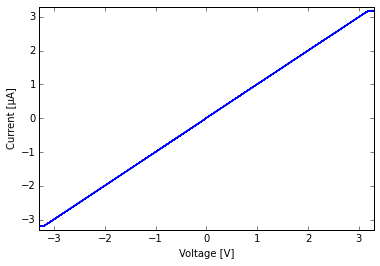

In [13]:
plt.plot(df1.V[:-1000], df1.I[:-1000])
plt.xlabel(u'Voltage [V]')
plt.ylabel(u'Current [µA]')
plt.xlim(-3.3, 3.3)
plt.ylim(-3.3, 3.3)

In [95]:
m = np.logical_and(df1.x[:-1000] < 3800, df1.x[:-1000] > 200)
x = df1.x[:-1000][m]
y = df1.y[:-1000][m]

In [96]:
mb = np.polyfit(x, y, 1)
y_fit = np.polyval(mb, x)

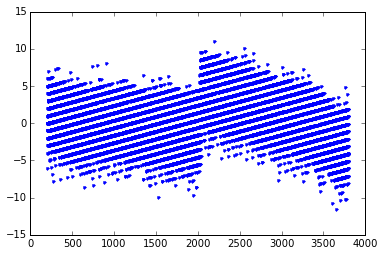

In [97]:
plt.plot(x, ((y-y_fit)), 'b.')

In [98]:
(y-y_fit).std()

3.1586228198162289

This is a fair bit of noise; I think a good next step would be to try using nicer data conversion settings (16 bit resolution, some number of averages maybe?).

(-0.033, 0.033)

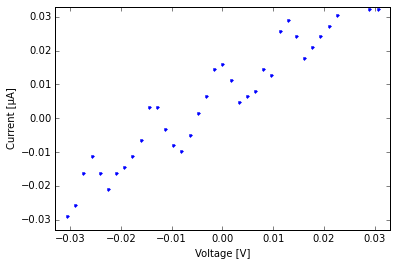

In [39]:
plt.plot(df1.V[1000:5000], df1.I[1000:5000], 'b.')
plt.xlabel(u'Voltage [V]')
plt.ylabel(u'Current [µA]')
plt.xlim(-0.033, .033)
plt.ylim(-0.033, .033)

In [58]:
df2 = pd.read_csv('R1M-test-3uA-current-range-47pF-DAC.csv')
convert_data(df2, '3uA')

In [68]:
x = df2.x[1000:-1000]
y = df2.y[1000:-1000]

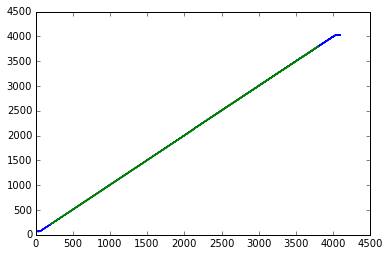

In [71]:
m = np.logical_and(x > 200, x < 3800)
plt.plot(x, y, x[m], y[m])
xf, yf = x[m], y[m]

In [72]:
mb = np.polyfit(xf, yf, 1)

In [74]:
yf_fit = np.polyval(mb, xf)

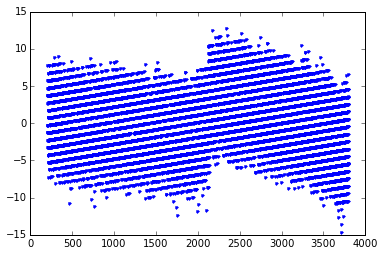

In [93]:
plt.plot(xf, yf - yf_fit, 'b.')

In [100]:
(yf - yf_fit).std()

4.3301843129486137

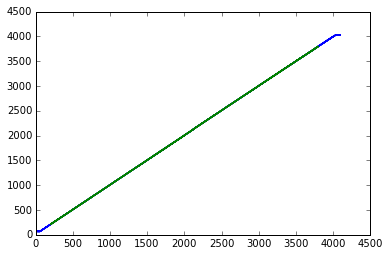

In [104]:
df3 = pd.read_csv('R1M-test-3uA-current-range-0-pF-dac.csv')
convert_data(df3, '3uA')
x = df3.x[1000:-1000]
y = df3.y[1000:-1000]
m = np.logical_and(x > 200, x < 3800)
plt.plot(x, y, x[m], y[m])
xf, yf = x[m], y[m]
mb = np.polyfit(xf, yf, 1)
yf_fit = np.polyval(mb, xf)

5.4106100355614197

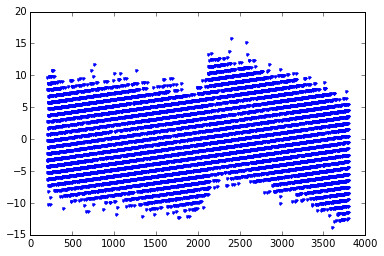

In [105]:
plt.plot(xf, yf - yf_fit, 'b.')
(yf - yf_fit).std()

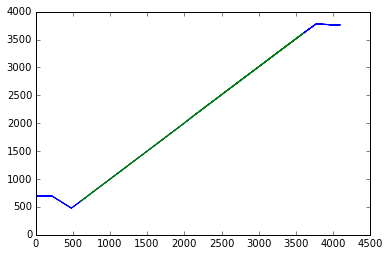

In [108]:
df4 = pd.read_csv('R1k-test-3mA-current-range-47-pF-dac.csv')
convert_data(df4, '3mA')
x = df4.x[1000:-1000]
y = df4.y[1000:-1000]
m = np.logical_and(x > 600, x < 3600)
plt.plot(x, y, x[m], y[m])
xf, yf = x[m], y[m]
mb = np.polyfit(xf, yf, 1)
yf_fit = np.polyval(mb, xf)

1.9750436460360614

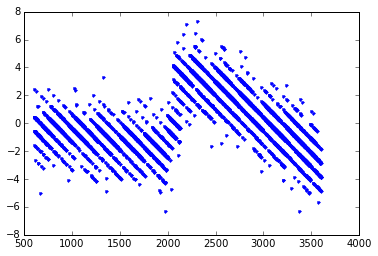

In [109]:
plt.plot(xf, yf - yf_fit, 'b.')
(yf - yf_fit).std()

In [112]:
polyval()

array([ 1.00710696, -9.74185935])